In [48]:
#Import necessary libarbies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [49]:
loan_df=pd.read_csv(r'C:\Users\USER\Guvi python\Forage\Task 3 and 4_Loan_Data.csv')
# Initial inspection
print(loan_df.info())
print(loan_df.describe(include='all'))
print(loan_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB
None
        customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  1.000000e+04              10000.000000          10000.000000   
mean   4.974577e+06                  1.461200           4159.677034   
std    2.293890e+06                  1.743846           1421.399078   
mi

In [50]:
loan_df.columns

Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default'],
      dtype='object')

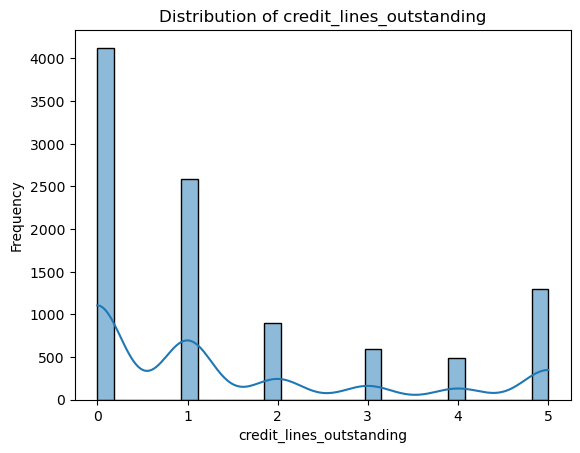

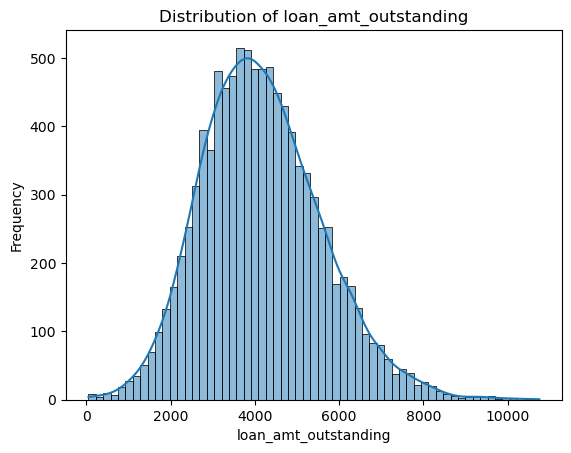

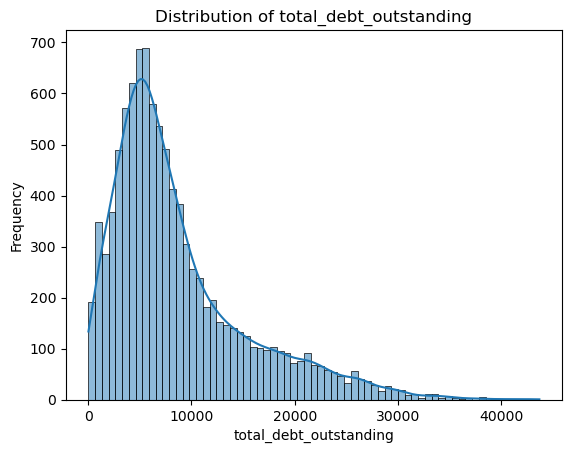

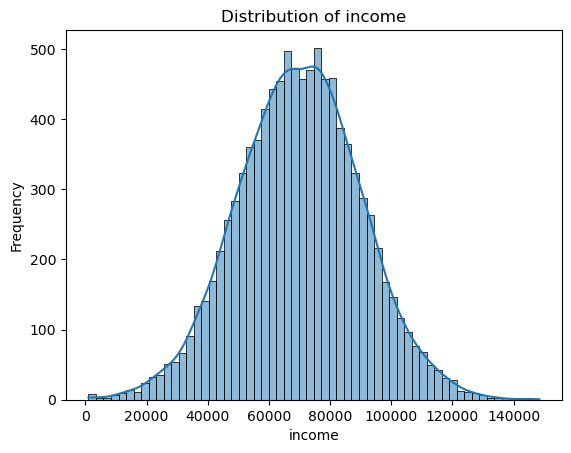

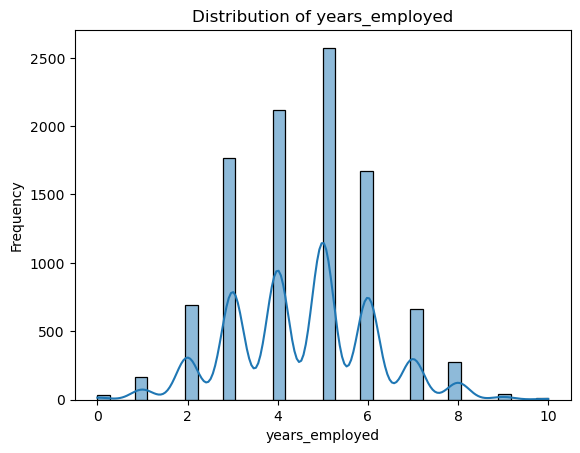

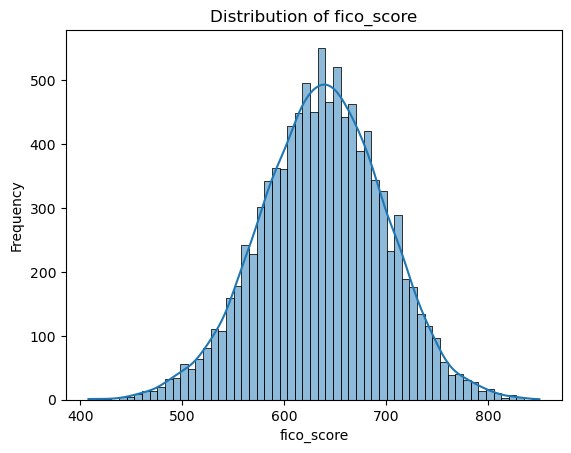

In [51]:
#Exploratory Data Analysis
for col in ['credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score']:
    sns.histplot(loan_df,x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

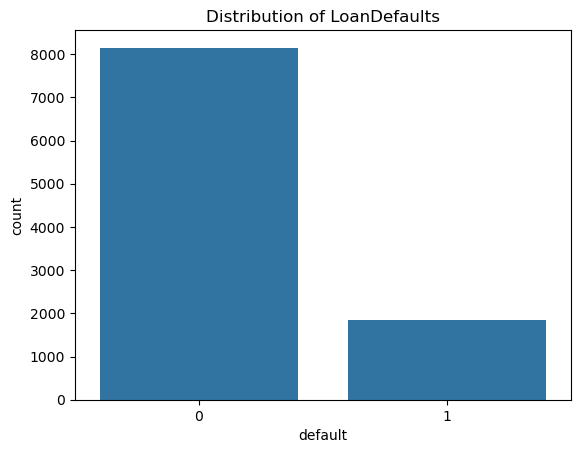

In [22]:
# Distribution of the target variable
sns.countplot(x='default', data=loan_df)
plt.title('Distribution of LoanDefaults')
plt.show()

In [27]:
#crosstab and Chi2 test

#Null Hypothesis : the cols are independent with Incident grade (not correlated)
#Alternate Hypothesis : the cols are correlated
#if p_value is >=0.05 then failed to reject null hypothesis
from scipy.stats import chi2_contingency

# Initialize summary list
summary_results = []

# Loop through columns
for col in loan_df.columns[:-1]:
    
    crosstab = pd.crosstab(loan_df[col], loan_df['default'])
    print(f"Crosstab of {col} and default:\n{crosstab}\n")
    
    # Perform Chi-Squared Test
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-squared: {chi2}, p-value: {p}\n")
    
    # Append results to the summary list
    summary_results.append({
        'Column': col,
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof,
        'Significant': p < 0.05
    })

# Create a summary DataFrame
summary_df = pd.DataFrame(summary_results)


print(summary_df)


Crosstab of customer_id and default:
default      0  1
customer_id      
1000324      0  1
1000522      1  0
1001059      1  0
1001679      0  1
1005074      1  0
...         .. ..
8997104      1  0
8998011      1  0
8998628      1  0
8999218      1  0
8999789      1  0

[10000 rows x 2 columns]

Chi-squared: 10000.000000000002, p-value: 0.49529839453867835

Crosstab of credit_lines_outstanding and default:
default                      0     1
credit_lines_outstanding            
0                         4128     0
1                         2590     0
2                          895     7
3                          462   137
4                           72   412
5                            2  1295

Chi-squared: 8833.861690832404, p-value: 0.0

Crosstab of loan_amt_outstanding and default:
default               0  1
loan_amt_outstanding      
46.783973             1  0
50.203718             1  0
57.348647             1  0
57.434185             1  0
57.706078             1  0
...        

1.There are no null values , so we can proceed without preprocessing
2.EDA shows the distribution of the data across various bins
3.credit_lines_outstanding,years_employed,fico_score are the correlated columns for the default columnHowever since the there are fewer columns , all the columns are taken to train the model.



LogisticRegression


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC AUC Score: 0.9977957521528777


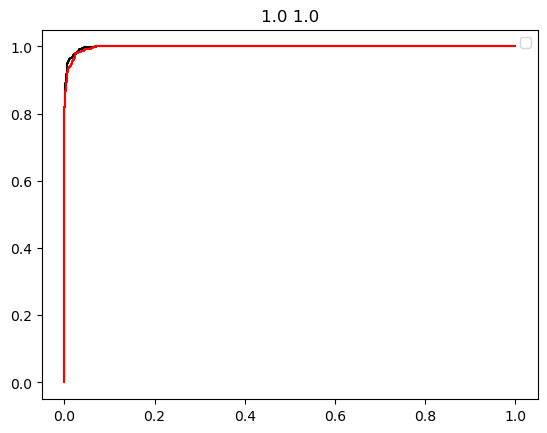

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


DecisionTreeClassifier
ROC AUC Score: 0.9894161856549544


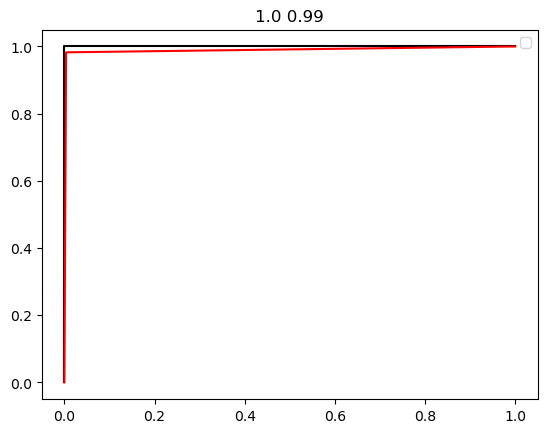

RandomForestClassifier


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC AUC Score: 0.999525214976432


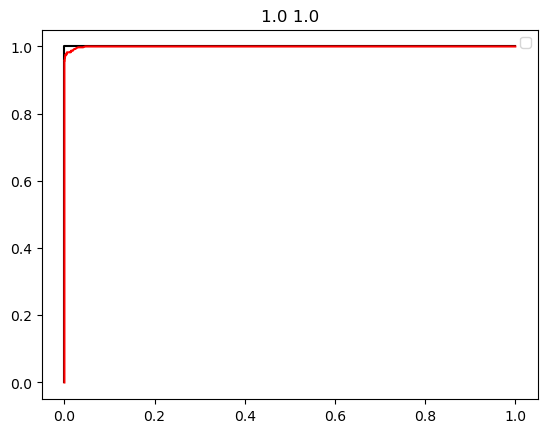

AdaBoostClassifier


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC AUC Score: 0.9996668721473982


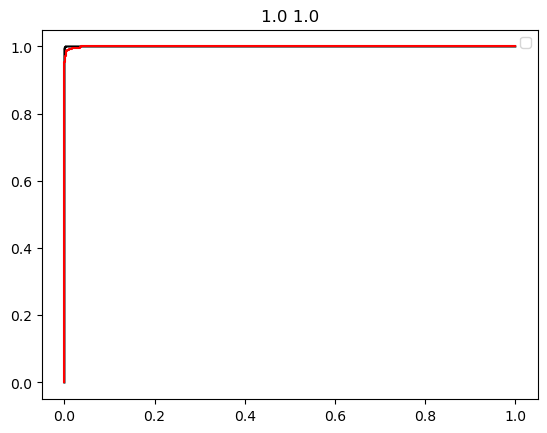

GradientBoostingClassifier


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC AUC Score: 0.999146943629786


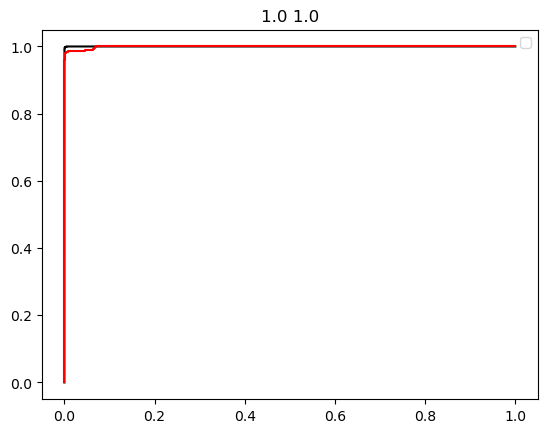

In [53]:
#Data Splitting
X = loan_df.drop(columns=['default'],axis=1)  # Drop output column 
y = loan_df['default']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2)

models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for model in models:
    print(type(model).__name__)
    model.fit(x_train,y_train)
    
    train_prediction = model.predict_proba(x_train)[:, 1]
    test_prediction = model.predict_proba(x_test)[:, 1]

    #probs = clf.predict_proba(x_test)[:, 1]
    print("ROC AUC Score:", roc_auc_score(y_test, test_prediction))
    
    t_fpr,t_tpr,t_threshold = roc_curve(y_train,train_prediction)
    t_auc = roc_auc_score(y_train,train_prediction)
    
    fpr,tpr,threshold = roc_curve(y_test,test_prediction)
    auc = roc_auc_score(y_test,test_prediction)
    
    plt.plot(t_fpr,t_tpr,c='black')
    plt.plot(fpr,tpr,c='red')
    
    plt.title(str(round(t_auc,2))+" " +str(round(auc,2)))
    plt.legend()
    plt.show()


AdaBoostClassifier


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC AUC Score: 0.9996668721473982


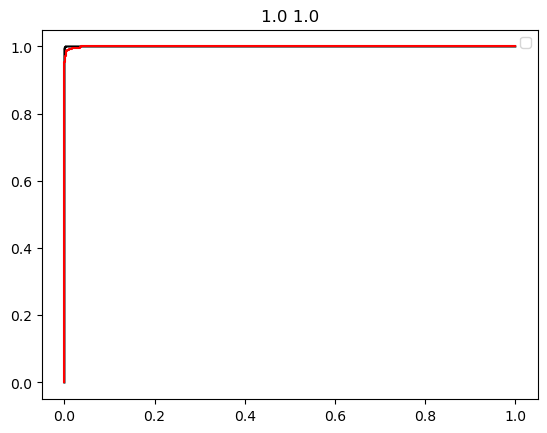

In [54]:
#AdaBoost Classifier is performing better

model=AdaBoostClassifier()

print(type(model).__name__)
model.fit(x_train,y_train)

train_prediction = model.predict_proba(x_train)[:, 1]
test_prediction = model.predict_proba(x_test)[:, 1]

#probs = clf.predict_proba(x_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, test_prediction))

t_fpr,t_tpr,t_threshold = roc_curve(y_train,train_prediction)
t_auc = roc_auc_score(y_train,train_prediction)

fpr,tpr,threshold = roc_curve(y_test,test_prediction)
auc = roc_auc_score(y_test,test_prediction)

plt.plot(t_fpr,t_tpr,c='black')
plt.plot(fpr,tpr,c='red')

plt.title(str(round(t_auc,2))+" " +str(round(auc,2)))
plt.legend()
plt.show()

In [67]:
#Given recovery rate is 10%
LGD = 0.9  # 1 - recovery rate #LossGIvenDefault

def expected_loss(input_data):
    input_df = pd.DataFrame([input_data])
    pd_estimate = model.predict_proba(input_df)[0][1]
    loan_amount = input_data.get("loan_amt_outstanding", 0)
    return pd_estimate * LGD * loan_amount


input_data={'customer_id':int(input('Enter the customer id : ')),
            'credit_lines_outstanding':int(input('Enter the oustanding credit lines: ')),
            'loan_amt_outstanding':float(input('Enter the outstanding loan amount: ')),
            'total_debt_outstanding':float(input('Enter the total outstanding debt: ')),	
            'income':float(input('Enter the income: ')),
            'years_employed':int(input('Enter the number of years employed: ')),
            'fico_score':int(input('Enter the FICO score: '))
           }

print(f'Expected loss for the given customer is {expected_loss(input_data)}')

Enter the customer id :  4616950
Enter the oustanding credit lines:  4
Enter the outstanding loan amount:  3302.172238
Enter the total outstanding debt:  13067.57021
Enter the income:  50352.16821
Enter the number of years employed:  3
Enter the FICO score:  545


Expected loss for the given customer is 1790.575149591317
